In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data DA/Dữ liệu Lịch sử HSG.csv')

In [ ]:
# Rename columns
df.rename(columns={"Ngày":"Date","Lần cuối":"Close","Mở":"Open","Cao":"High","Thấp":"Low","KL": "Volume","% Thay đổi": "percent_change"}, inplace= True)

In [ ]:
# convert date field from string to Date format and make it index
def tranformData(df: pd.DataFrame):
  df['Date'] = pd.to_datetime(df.Date, format='%d/%m/%Y')
  df['Close'] = df['Close'].astype(str).apply(lambda x: float(x.replace(',', '')))
  df['Open'] = df['Open'].astype(str).apply(lambda x: float(x.replace(',', '')))
  df['High'] = df['High'].astype(str).apply(lambda x: float(x.replace(',', '')))
  df['Low'] = df['Low'].astype(str).apply(lambda x: float(x.replace(',', '')))
  def convert_to_number(x):
      if 'M' in x:
          return float(x.replace('M', '')) * 1000000
      elif 'K' in x:
          return float(x.replace('K', '')) * 1000
      else:
          return float(x)
  df['Volume'] = df['Volume'].apply(convert_to_number)
  df['percent_change'] = df['percent_change'].apply(lambda x: float(x.strip('%'))/100)

In [ ]:
tranformData(df)
df

,Date,Close,Open,High,Low,Volume,percent_change
0,2023-05-24,15750.0,16100.0,16100.0,15650.0,10890000.0,-0.0125
1,2023-05-23,15950.0,16150.0,16300.0,15850.0,14910000.0,-0.0124
2,2023-05-22,16150.0,15600.0,16300.0,15600.0,20020000.0,0.0386
3,2023-05-19,15550.0,15500.0,15750.0,15400.0,6170000.0,0.0065
4,2023-05-18,15450.0,15600.0,15700.0,15450.0,8700000.0,-0.0032
...,...,...,...,...,...,...,...
1359,2017-12-07,14666.1,15098.3,15184.8,14550.9,5520000.0,-0.0155
1360,2017-12-06,14896.6,14464.4,15069.5,14320.4,9470000.0,0.0258
1361,2017-12-05,14522.1,15040.7,15242.4,14522.1,12280000.0,-0.0175
1362,2017-12-04,14781.4,14061.0,14781.4,13830.5,13710000.0,0.0688


In [ ]:
df=df.set_index('Date')
df = df.sort_index()
df

,Close,Open,High,Low,Volume,percent_change
Date,,,,,,
2017-12-01,13830.5,13772.9,13917.0,13657.6,4410000.0,0.0084
2017-12-04,14781.4,14061.0,14781.4,13830.5,13710000.0,0.0688
2017-12-05,14522.1,15040.7,15242.4,14522.1,12280000.0,-0.0175
2017-12-06,14896.6,14464.4,15069.5,14320.4,9470000.0,0.0258
2017-12-07,14666.1,15098.3,15184.8,14550.9,5520000.0,-0.0155
...,...,...,...,...,...,...
2023-05-18,15450.0,15600.0,15700.0,15450.0,8700000.0,-0.0032
2023-05-19,15550.0,15500.0,15750.0,15400.0,6170000.0,0.0065
2023-05-22,16150.0,15600.0,16300.0,15600.0,20020000.0,0.0386


In [ ]:
# Tính số lượng mẫu trong tập huấn luyện, tập kiểm tra
train_size = int((len(df)-1) * 0.7)
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

# Chia dữ liệu thành tập huấn luyện, tập kiểm tra
X = df[['Close']].iloc[:-1]
Y = df['Close'].shift(-1).iloc[:-1]

X_train, Y_train = X[:train_size], Y[:train_size]
X_test,Y_test = X[train_size:train_size+test_size],Y[train_size:train_size+test_size]
X_val, Y_val = X[train_size+test_size:], Y[train_size+test_size:]

In [ ]:
# Tạo dictionary params chứa các giá trị của tham số k
params = {'n_neighbors': [i for i in range(1, 30)]}

# Tạo một model KNN mới
knn_model = KNeighborsRegressor()

# Sử dụng GridSearchCV để tìm giá trị tối ưu của k dựa trên tập train
grid_search = GridSearchCV(knn_model, params, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)

# In giá trị tối ưu của k
print("Giá trị tối ưu của k:", grid_search.best_params_['n_neighbors'])

# Tạo một model KNN mới với k tối ưu được chọn
knn_model = KNeighborsRegressor(n_neighbors= grid_search.best_params_['n_neighbors'])

# Huấn luyện model trên tập train
knn_model.fit(X_train, Y_train)


Giá trị tối ưu của k: 1


KNeighborsRegressor(n_neighbors=1)

In [ ]:
print(Y_train)

Date
2017-12-01    14781.4
2017-12-04    14522.1
2017-12-05    14896.6
2017-12-06    14666.1
2017-12-07    14349.2
               ...   
2021-09-23    37833.3
2021-09-24    36666.7
2021-09-27    38333.3
2021-09-28    38250.0
2021-09-29    38750.0
Name: Close, Length: 954, dtype: float64


In [ ]:
pred_dates=Y_test.index
last_price=Y_train.iloc[-1]
Y_pred=Y_test.copy()
for date in pred_dates:
  pred = knn_model.predict([[last_price]])
  if len(pred) != 1:
    print("Error: Invalid prediction shape.")
    break
  Y_pred.loc[date]=pred[0] 
  last_price=pred[0]     


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

In [ ]:
print(Y_pred)

Date
2021-09-30    37833.3
2021-10-01    36666.7
2021-10-04    38333.3
2021-10-05    38250.0
2021-10-06    38750.0
               ...   
2022-10-25    38333.3
2022-10-26    38250.0
2022-10-27    38750.0
2022-10-28    37833.3
2022-10-31    36666.7
Name: Close, Length: 272, dtype: float64


In [ ]:
pred_dates=Y_val.index
last_price=Y_test.iloc[-1]
Y_pred_val=Y_val.copy()
for date in pred_dates:
  pred = knn_model.predict([[last_price]])
  if len(pred) != 1:
    print("Error: Invalid prediction shape.")
    break
  Y_pred_val.loc[date]=pred[0] 
  last_price=pred[0]    
print(Y_pred_val)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

Date
2022-11-01    11553.0
2022-11-02    11628.8
2022-11-03    11325.8
2022-11-04    11212.1
2022-11-07    11363.6
               ...   
2023-05-17    13484.8
2023-05-18    13484.8
2023-05-19    13484.8
2023-05-22    13484.8
2023-05-23    13484.8
Name: Close, Length: 137, dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

In [ ]:
last_date=Y_val.index[-1]
forecast_dates = pd.date_range(last_date, periods=30, freq='D')[1:]
forecast_df = pd.DataFrame([(date, 0) for date in forecast_dates], columns=['Date', 'Close'])
last_price = Y_val.iloc[-1]
for i in range(30):
    pred = knn_model.predict([[last_price]])
    if len(pred) != 1:
        print("Error: Invalid prediction shape.")
        break
    forecast_df.at[i, 'Close'] = pred[0]
    last_price = pred[0]

# In kết quả dự đoán
print(forecast_df)

         Date    Close
0  2023-05-24  14694.9
1  2023-05-25  14694.9
2  2023-05-26  14694.9
3  2023-05-27  14694.9
4  2023-05-28  14694.9
5  2023-05-29  14694.9
6  2023-05-30  14694.9
7  2023-05-31  14694.9
8  2023-06-01  14694.9
9  2023-06-02  14694.9
10 2023-06-03  14694.9
11 2023-06-04  14694.9
12 2023-06-05  14694.9
13 2023-06-06  14694.9
14 2023-06-07  14694.9
15 2023-06-08  14694.9
16 2023-06-09  14694.9
17 2023-06-10  14694.9
18 2023-06-11  14694.9
19 2023-06-12  14694.9
20 2023-06-13  14694.9
21 2023-06-14  14694.9
22 2023-06-15  14694.9
23 2023-06-16  14694.9
24 2023-06-17  14694.9
25 2023-06-18  14694.9
26 2023-06-19  14694.9
27 2023-06-20  14694.9
28 2023-06-21  14694.9
29        NaT  14694.9


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

In [ ]:
valid_rmse = np.sqrt(np.mean((Y_pred_val - Y_val)**2))
test_rmse = np.sqrt(np.mean((Y_pred - Y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 2273.4387208306857
Testing RMSE: 16203.127771656693


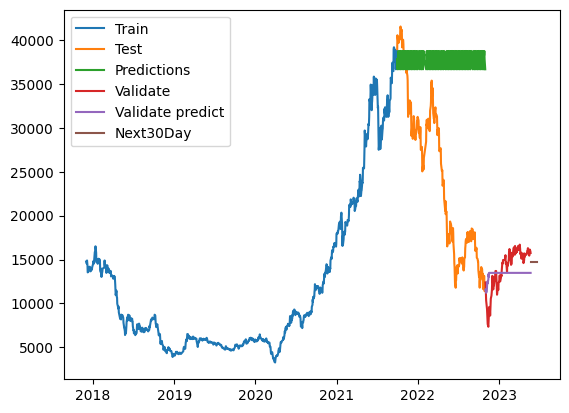

In [ ]:
# 9.Vẽ hình
plt.plot(Y_train.index, Y_train)
plt.plot(Y_test.index, Y_test)
plt.plot(Y_test.index, Y_pred)
plt.plot(Y_val.index, Y_val)
plt.plot(Y_val.index, Y_pred_val)
plt.plot(forecast_df['Date'], forecast_df['Close'])
plt.legend(['Train', 'Test', 'Predictions','Validate','Validate predict','Next30Day'])
plt.show()

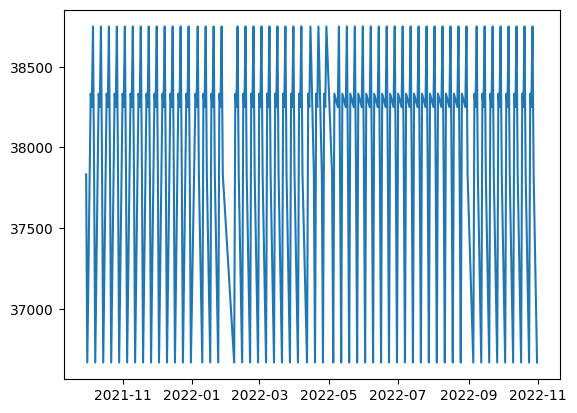

In [ ]:
plt.plot(Y_pred.index, Y_pred)
plt.show()